<a href="https://colab.research.google.com/github/Dany511/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Email Campaign Effectiveness Prediction </u></b>

## <b> Problem Description </b>

### Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business.The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader.


## <b> Introduction </b>

### Email marketing is a type of direct marketing that uses personalized emails to educate your email list about your product or services. An email marketing campaign is a scheduled series of emails used to nurture leads and current customers with the purpose of encouraging engagement and increasing sales. Each individual email leads to a specific call-to-action, i.e. getting users to sign up, book a call, continue reading, or add a product to their cart.

### Email marketing involves segmenting your target audience based on their likes and preferences to share personalized content with them. This makes them feel valued and important through personalized subject content like subject lines. Through email marketing, you will be able to increase your conversion rate. Over 65% of email users have shared that they have made a purchase through email through their phones or desktop as they found that the message was compelling. 

### In this problem statement, we will be trying to create machine learning models that characterize and track whether the mail is ignored, read or acknowledged by the reader.

### So let's begin!

## **Import Libraries**

In [1]:
#Importing all the necessary libraries
import pandas as pd 
import numpy as np

#Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing VIF(variance infalation factor) to check for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing train_test_split for splitting the data
from sklearn.model_selection import train_test_split

# Importing Grid Search and Randomized search for Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

# Importing Metrics for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score,f1_score, recall_score,roc_curve, classification_report

# To ignore warnings
import warnings    
warnings.filterwarnings('ignore')

## **Load the Dataset**

In [2]:
# Loading the dataset using pandas read_csv.
data=pd.read_csv("/content/data_email_campaign.csv")
# .head() function gives the preview of the data
data.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [3]:
# Data shape
data.shape

(68353, 12)

In [4]:
# The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


### There are 5 Numerical and 6 Categorical variables in the dataset

In [5]:
# Copying the dataset to a dataframe named df.
df=data.copy()

In [6]:
# Dropping the 'Email_ID' column because it is not useful in model building
df=df.drop("Email_ID",axis=1)

In [7]:
# Descriptive summary of the dataset
df.describe(include='all')

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,56758,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
unique,NaN,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,G,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,23173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.285094,1.095481,1.456513,NaN,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,NaN,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,NaN,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,NaN,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,NaN,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,NaN,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000


# **EDA**

### Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.It involves exploring and analyzing the dataset given to find out patterns, trends and conclusions to take better decisions related to the data. In this section, we will be trying to obtain those features which help our emails not get ignored.

## **Data Cleaning**

## Check for Null values

### A null value in a relational database is used when the value in a column is unknown or missing. A null is neither an empty string (for character or datetime data types) nor a zero value (for numeric data types).

In [8]:
# Checking for Null values in the dataframe
df.isnull().sum()

Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

### We have Null values present in these columns 
### • Customer_Location
### • Total_Past_Communications
### • Total_Links
### • Total_Images

## **Univariate Analysis**

### Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression ) and it’s major purpose is to describe; It takes data, summarizes that data and finds patterns in the data.

In [9]:
# Create a list of all the numerical features in the dataset.
numerical_columns=["Word_Count","Total_Past_Communications","Total_Links","Total_Images","Subject_Hotness_Score"]

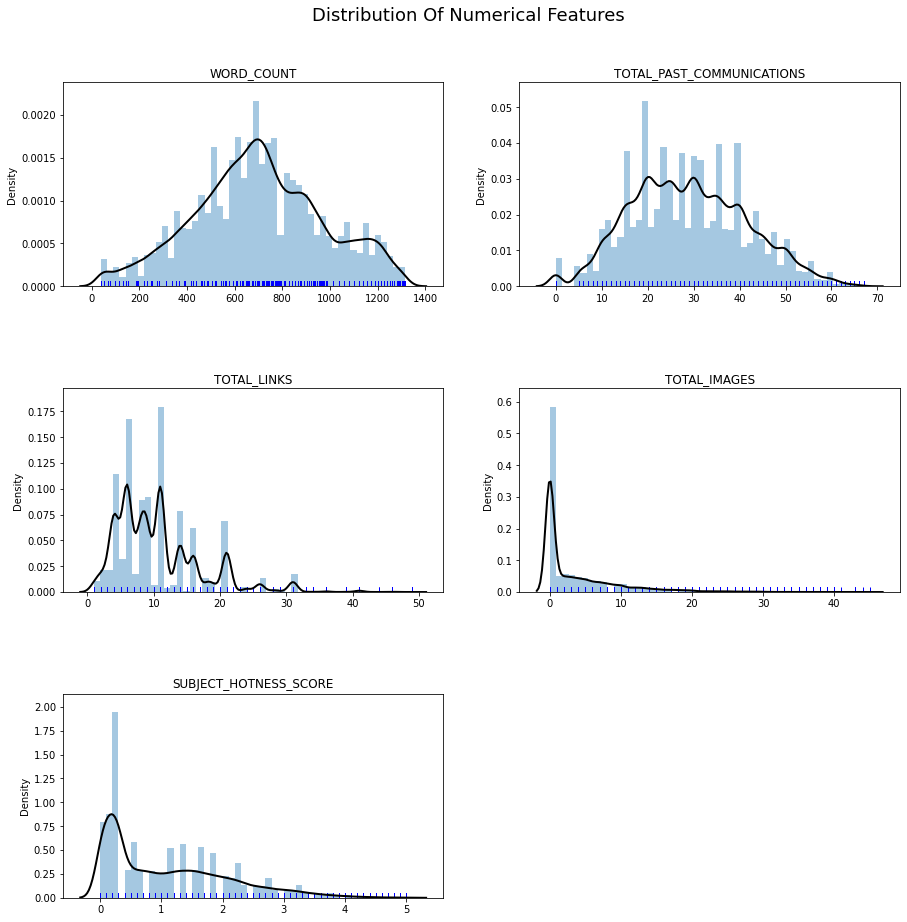

In [10]:
# define subplot grid
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
plt.subplots_adjust(hspace=0.5)
axs[2][1].set_visible(False) # Ignore the last subplot beacause we dont need it
fig.suptitle("Distribution Of Numerical Features", fontsize=18, y=0.95) # Define a title to the plot

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.distplot(x=df[col],ax=ax,rug=True, rug_kws={"color": "b"},kde_kws={"color": "k", "lw": 2, "label": "KDE"})

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("")

### We observe that the distribution of Total_Past_Communications and Word_Count follows Normal distribution. So it is fine to the use mean to fill up the Null values in 'Total_Past_Communications' column.

### Rest of the features were highly skewed on the right. Mode is robust to outliers so we use mode to fill up the missing values in Total_Links and Total_Images columns. 

## **Imputing Missing Values**

In [11]:
# Filling the null values with the mean of the column
df['Total_Past_Communications']=df["Total_Past_Communications"].fillna(df['Total_Past_Communications'].mean())

In [12]:
# Filling the null values with the mode of the column 
df['Total_Links']=df["Total_Links"].fillna(df['Total_Links'].mode()[0])
df['Total_Images']=df["Total_Images"].fillna(df['Total_Images'].mode()[0])

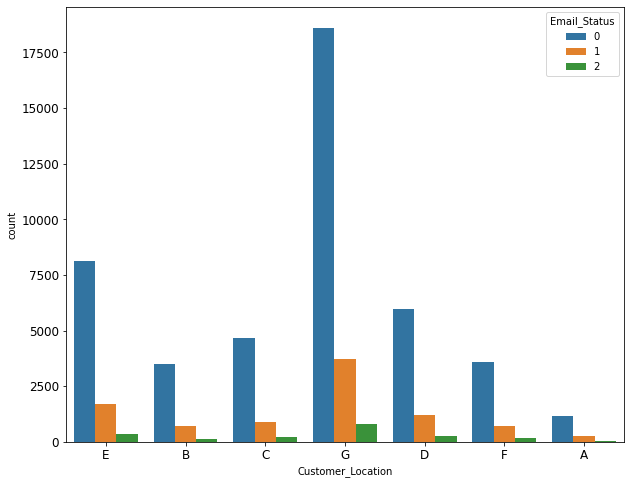

In [13]:
# Plot of frequency of Email status per each customer locatiion 
plt.figure(figsize=(10,8)) # define figure size
plt.ylabel("Frequency of Email Status")
ax=sns.countplot(df['Customer_Location'],hue=df['Email_Status']) # Using seaborn's countplot for visualization
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()


### After observing the frequency graph of different values of  Customer_location with respect to the Email_status category, we found that the customer location has nothing to do with Email_Status. we came to a conclusion that the email being Ignored, Read or Acknowledged is the same irrespective of the location.

### So we drop Customer_Location feature

In [14]:
# Dropping the Customer_Location column
df=df.drop('Customer_Location',axis=1)

## **Correlation Heat Map**

### Correlation heatmaps are a type of plot that visualize the strength of relationships between numerical variables. Correlation plots are used to understand which variables are related to each other and the strength of this relationship. A correlation plot typically contains a number of numerical variables, with each variable represented by a column. The rows represent the relationship between each pair of variables. The values in the cells indicate the strength of the relationship, with positive values indicating a positive relationship and negative values indicating a negative relationship.

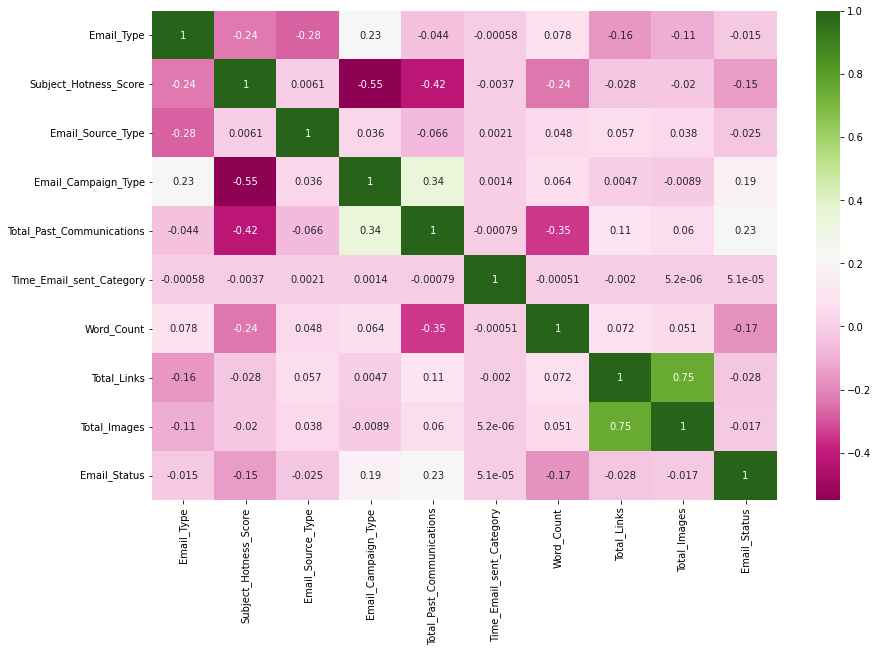

In [15]:
#Correlation matrix
plt.figure(figsize=(14,9))
sns.heatmap(df.corr(), cmap='PiYG', annot=True) # using seaborn's heatmap for visualization
plt.show()

### we can observe that the correlation between Total_Links and Total_Images is 0.75 (high correlation)

### Email Campaign Type and word count shows positive correlation with emails being read and acknowledged.

### Email_type and Subject Hotness score are the most negatives amongst other.

## **Bivariate Analysis**

### Bivariate analysis is one of the statistical analysis where two variables are observed. One variable here is dependent while the other is independent. These variables are usually denoted by X and Y. So, here we analyse the changes occured between the two variables and to what extent.

In [16]:
# Create a list of all the categorical features in the dataset
categorical_columns=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']

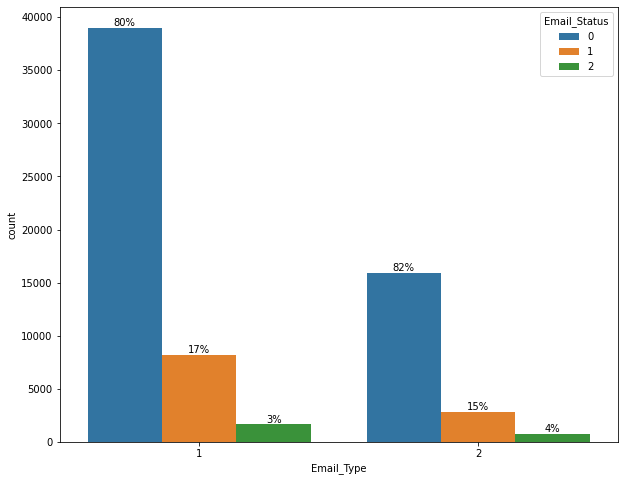

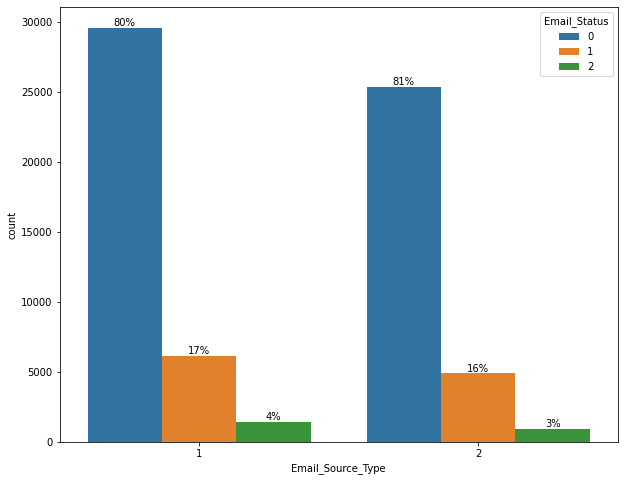

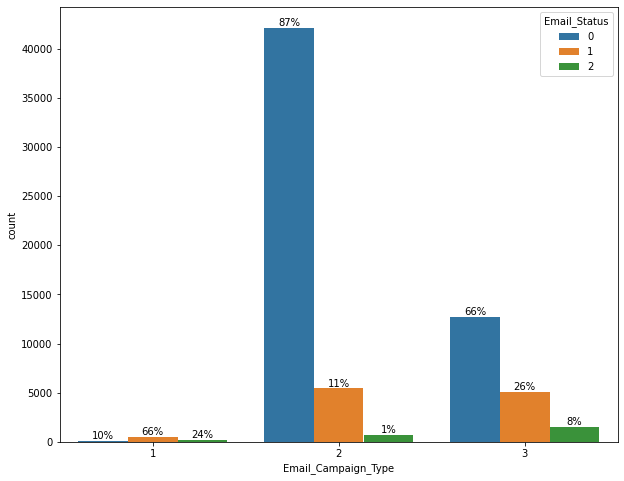

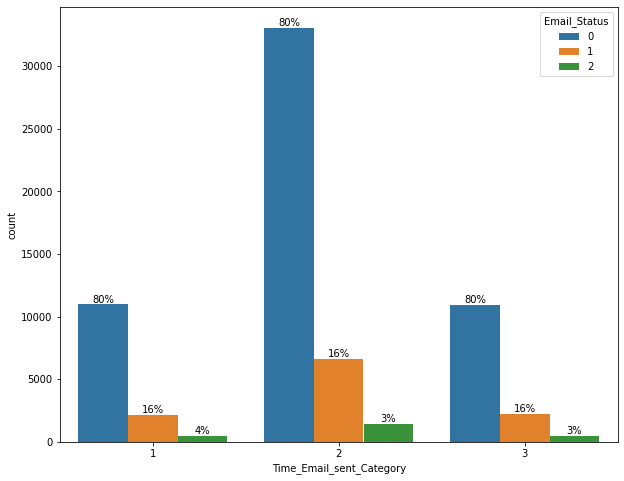

In [17]:
# loop through numerical_columns and axes  
for i,col in enumerate(categorical_columns):
  plt.figure(figsize=(10,8))
  ax=sns.countplot(x=df[col], hue=df["Email_Status"]) # using seaborn's countplot for visualization
  unique = len([x for x in df[col].unique() if x==x])
  bars = ax.patches
  # Iterate through the unique list
  for i in range(unique):
      catbars=bars[i:][::unique]
      #get height
      total = sum([x.get_height() for x in catbars])
      #print percentage
      for bar in catbars:
        ax.text(bar.get_x()+bar.get_width()/2.,
                    bar.get_height(),
                    f'{bar.get_height()/total:.0%}',
                    ha="center",va="bottom")
  plt.show()
    

### • The emails of type 1 are sent more than the email type 2. But the proportion of ignored, read and acknowledged mails are same for both email types 

### • Both the email source types have similar proportion of ignored, read and acknowledge mails. This shows that the email source type has nothing to do with email status

### • In the Email campaign type feature, eventhough the number of email sent through campaign type 1 are very few they have a high possibility of getting read. Most emails were sent from campaign type 2 and 80% of them are ignored. Seems like campaign 3 was a success beacuse even when less number of emails were sent under campaign 3, more emails were read and acknowledged.


### • From the last graph above we infer that our target variable, i.e.Email_Status does not depend upon Time_Email_sent_catagory.

## **Outlier Detection**

### Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

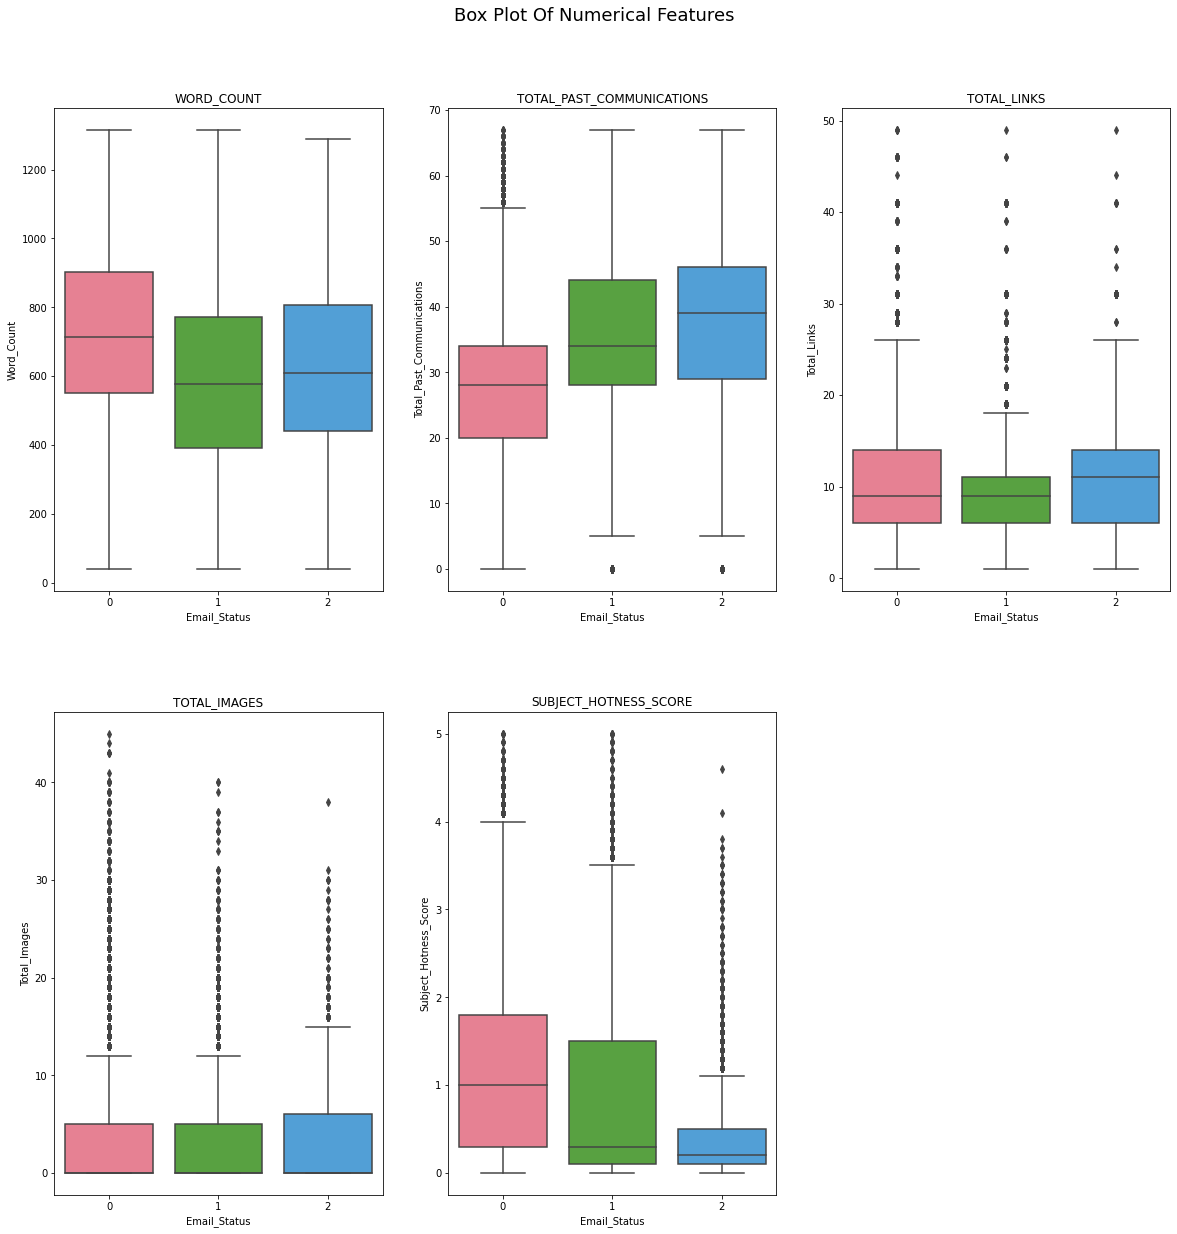

In [18]:
# define subplot grid
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 20)) # Creating subplots
plt.subplots_adjust(hspace=0.25) # Adjusting hoprizontal space
fig.suptitle("Box Plot Of Numerical Features", fontsize=18, y=0.95)
axs[1][2].set_visible(False) # Make the last subplot as invincible

# loop through numerical_columns and axes
for col, ax in zip(numerical_columns, axs.ravel()):
    # filter df for column and plot on specified axes
    sns.boxplot(x=df['Email_Status'],y=df[col],ax=ax,palette="husl")

    # chart formatting
    ax.set_title(col.upper())
    ax.set_xlabel("Email_Status")

plt.show()

### • As the word_count increases beyond 600, we can see that there is high possibilty of email being ignored. The more the words in a email,the more it has a tendency to ignored. 
### • In the Total_Past_Coomunications, median of ignored emails was around 28 with a few outliers. Analyzing Total_Past_Communications, we can see that the increase in the total past communications increases the chance of email being read or acknowledged.This is just about making connection with your customers.
### • The median is almost same in all of the three cases in total links feature with a number of outliers.
### • We can see that increase in Total Images increases the chance of email being ignored.
### • In the Subject_Hotness_Score, median of ignored emails was around 1 with a few outliers and the median for read and acknowledged email are much lower which is around 0.2 to 0.5

## **Multicollinearity and Feature Selection**

### Multicollinearity occurs when two or more independent continuous features in the dataset are highly correlated and can help predict each other and the dependent variable. This makes it difficult to individually analyse the affect of these individual independent variables on the target or dependent variable.

### We can quantify multicollinearity using Variance Inflation Factors (VIF)

### VIF = 1/(1-R^2) The more the value of R^2 is closer to 1 the more, VIF score tends to infinity. VIF starts with 1 and denotes that the variable has no correlation at all. VIF more than 5-10 can be considered as serious case of multicollinearity and can affect prediction models.

In [19]:
# Function to calculate the vif values
def vif_calc(df):
  vif = pd.DataFrame() # creating a empty dataframe to store the vif values
  vif["features"] = df.columns # copying feature names from df.columns list to Vif dataframe
  vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])] #calculating vif values for each feature
  return(vif)

In [20]:
#let's get the VIF scores
# Create a list of all the categorical features in the dataset
categorical_variables = ['Email_Type','Email_Source_Type','Customer_Location','Email_Campaign_Type','Time_Email_sent_Category']
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]]) # Using the vif_calc function to calculate the vif values
vif_df

,features,VIF
0,Subject_Hotness_Score,1.805701
1,Total_Past_Communications,3.939214
2,Word_Count,4.065844
3,Total_Links,8.690857
4,Total_Images,3.171439


### We can see that the VIF of Total_Links is greater than 5. Previously in the correlation heatmap we have seen that there is high correlation between Total_Links and Total_Images with a score of 0.75. So in order to avoid multicollinearity loss We can try combining both of these or deleting one of these.

In [21]:
# we try combining both the Total_Images and Total_Links
df['Links_Images']=df['Total_Images']+df['Total_Links'] # Adding Total_images and Total_links and creating a new column for the sum
df.drop(['Total_Images','Total_Links'],inplace=True,axis=1) # drop the old columns 

In [22]:
# Calculating vif to check for higher vif values
vif_df = vif_calc(df[[i for i in df.describe().columns if i not in categorical_variables + ['Email_Status']]])
vif_df

,features,VIF
0,Subject_Hotness_Score,1.734531
1,Total_Past_Communications,3.430879
2,Word_Count,3.687067
3,Links_Images,2.629047


## **Handling Outliers**

In [23]:
# Removing unwanted features from Numerical columns list
numerical_columns.append("Links_Images")
numerical_columns.remove("Word_Count")
numerical_columns.remove('Total_Links')
numerical_columns.remove('Total_Images')

In [24]:
print(numerical_columns)

['Total_Past_Communications', 'Subject_Hotness_Score', 'Links_Images']


## **Handling Outliers**

In [25]:
# Let's check the number of outliers in different features w.r.t Email_Status
outliers = {}
for col in numerical_columns:
  q_75, q_25 = np.percentile(df.loc[:,col],[75,25])
  IQR = q_75-q_25 # Calculate Inter quartile range
  max = q_75+(1.5*IQR)
  min = q_25-(1.5*IQR)
  outlier_list=[]
  outlier_list=df.loc[df[col] < min]['Email_Status'].tolist()
  outlier_list.append(df.loc[df[col] > max]['Email_Status'].tolist()) 
  outliers[col]={}
  for i in outlier_list[0]:
      outliers[col][i] = outliers[col].get(i,0) + 1
print(outliers)

{'Total_Past_Communications': {1: 56, 0: 67, 2: 13}, 'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}, 'Links_Images': {0: 3061, 1: 437, 2: 122}}


### We have calculated the number of outliers with respect to individual classes of Email_Status. The minority class in our target variable is 1 and 2. so before deleting te outliers we should check that we aren't deleting more than 5% of useful information from minority class. Otherwise the model cannot be able to classify the minority classes correctly.

In [26]:
# Lets check the percentage of outliers in minority and majority class
minority_outliers = 0  
majority_outliers = 0
# Iterating through each numerical column
for col in numerical_columns:
  # summing up the number of outliers
  minority_outliers += outliers[col][1]
  minority_outliers += outliers[col][2]
  majority_outliers += outliers[col][0]

# Summing up the minority and majority outliers
total_minority = df['Email_Status'].value_counts()[1] + df['Email_Status'].value_counts()[2]
total_majority = df['Email_Status'].value_counts()[0]

min_per = (minority_outliers/total_minority)*100   #number of outliers in minority classes by total number minority classes
maj_per = (majority_outliers/total_majority)*100  #number of outliers in majority class by total number of majority class
total_out = ((minority_outliers+majority_outliers)/(total_minority+total_majority))*100
print(f'The percentage of outliers in minority classes is {min_per}')
print(f'The percentage of outliers in majority class is {maj_per}')
print(f'The percentage of total outliers are {total_out}')

The percentage of outliers in minority classes is 5.256486728303012
The percentage of outliers in majority class is 6.002803006861907
The percentage of total outliers are 5.856363290565154


In [27]:
#deleting majority outliers
for col in numerical_columns:
  q_low = df[col].quantile(0.01) # calculating the value at 0.01 quantile 
  q_hi  = df[col].quantile(0.99) # calculating the value at 0.01 quantile 
  df = df.drop(df[(df[col] > q_hi) &  (df['Email_Status']==0)].index) # drop the values which are smaller than the lower limit
  df = df.drop(df[(df[col] < q_low) & (df['Email_Status']==0)].index) # drop the values which are larger than the upper limit

### Since we have more than 5% ouliers in minority section. we decide not to delete them.

## **Encoding Categorical Variables**

### One Hot Encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [28]:
#Creating a list of categorical features needed for encoding
Categorical_features=['Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']

In [29]:
#creating dummy variables
df = pd.get_dummies(df,columns=Categorical_features)
# As some columns are binary encoded we can drop either one of the columns
df.drop('Email_Type_2',axis=1,inplace=True)
df.drop('Email_Source_Type_2',axis=1,inplace=True)
df.head(1)

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Links_Images,Email_Type_1,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,2.2,33.0,440,0,8.0,1,0,0,1,0,1,0,0


## **Data Modelling**

In [30]:
# Selecting appropriate features for model building
selected_features=['Email_Type_1', 'Subject_Hotness_Score', 'Email_Source_Type_1','Email_Campaign_Type_1','Email_Campaign_Type_2','Email_Campaign_Type_3', 'Total_Past_Communications',
        'Word_Count','Links_Images','Time_Email_sent_Category_1','Time_Email_sent_Category_2','Time_Email_sent_Category_3']

In [31]:
# creating a Dataframe named X for all independent features 
x=df[selected_features]

In [32]:
x.head()

,Email_Type_1,Subject_Hotness_Score,Email_Source_Type_1,Email_Campaign_Type_1,Email_Campaign_Type_2,Email_Campaign_Type_3,Total_Past_Communications,Word_Count,Links_Images,Time_Email_sent_Category_1,Time_Email_sent_Category_2,Time_Email_sent_Category_3
0,1,2.2,0,0,1,0,33.0,440,8.0,1,0,0
1,0,2.1,1,0,1,0,15.0,504,5.0,0,1,0
2,0,0.1,1,0,0,1,36.0,962,5.0,0,1,0
3,1,3.0,0,0,1,0,25.0,610,16.0,0,1,0
4,1,0.0,0,0,0,1,18.0,947,4.0,0,1,0


In [33]:
# Create a dataframe named 'y' for the Targer variable
y=df['Email_Status']

## **Normalization**

### Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. Normalization is also required for some algorithms to model the data correctly.

In [34]:
# Importing Standardscaler and MinMaxScaler from sklearn library
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [35]:
# Creating an instance of MinMaxScaler
sc=StandardScaler()
# Applying the MinMaxScaler on X dataframe 
X=sc.fit_transform(x)

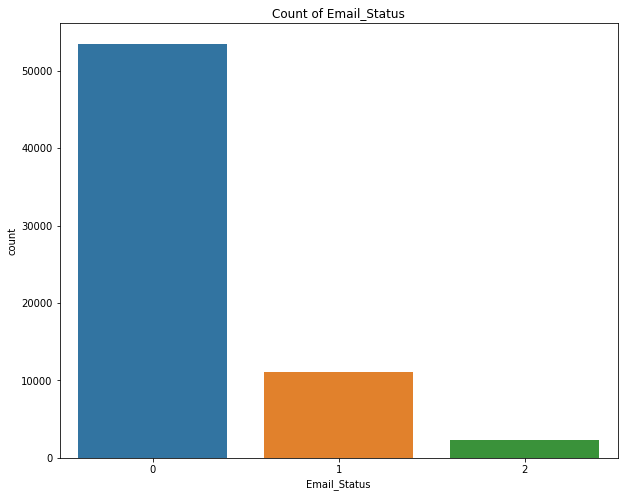

In [36]:
# Countplot of Email_Status
plt.figure(figsize=(10,8)) # define figure size
plt.title("Count of Email_Status") # give a title
sns.countplot(df['Email_Status'])
plt.show()

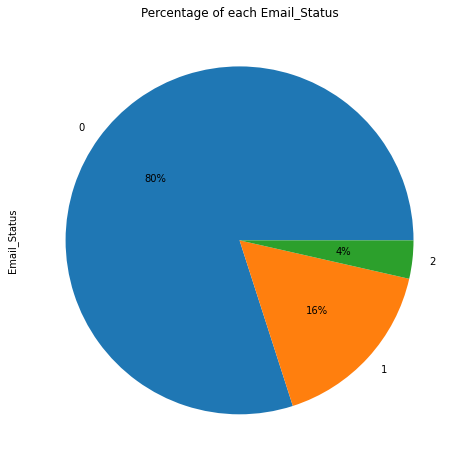

In [37]:
# Pie plot
plt.figure(figsize=(10,8)) #define figure size
plt.title("Percentage of each Email_Status") # give a title
df.groupby('Email_Status')['Email_Status'].count().plot(kind='pie',autopct='%1.0f%%') # Using groupby function and pandas pie plot for visualization
plt.show()

### From the above we can see that the number of mails ignored were more than number of mails read and acknowledged.This is called Class imbalance.

### In the case of class imbalance classifiers tend to make biased learning model that has a poorer predictive accuracy over the minority classes compared to the majority classes

### We can handle class imbalance using Oversampling or Undersampling

## **Train-Test Split**

In [38]:
#Importing train_test_split from sklearn.model_selection module
from sklearn.model_selection import train_test_split

In [39]:
# Splitting the data into x_train,x_test,y_train and y_test 
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=23,stratify=y) # Stratify argument is used to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset. 

In [40]:
x_train.shape

(53531, 12)

In [41]:
x_test.shape

(13383, 12)

## **Handling Class Imbalance**

In [42]:
#importing random under sampler from imbalance learn library
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True) #Creating an instance of RandomUnderSampler
x_rus,y_rus= rus.fit_resample(x_train,y_train) #Resampling the training data

#print shape
print('Original dataset shape:', len(y_train))
print('Resampled dataset shape', len(y_rus))

Original dataset shape: 53531
Resampled dataset shape 5694


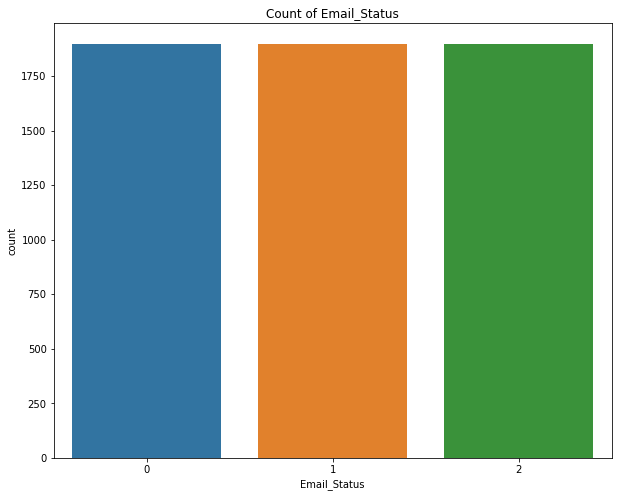

In [43]:
# Countplot of Email_Status for resampled data
plt.figure(figsize=(10,8)) # define figure size
plt.title("Count of Email_Status") # give a title
sns.countplot(y_rus)
plt.show()

## **Model Building**

In [44]:
# Import all the required classifiers and metrics from sklearn's library
from sklearn.linear_model import LogisticRegression #Importing LogisticRegression
#Importing SVM
from sklearn.svm import SVC 
#Importing Decision tree
from sklearn.tree import DecisionTreeClassifier
#Importing Random Forest
from sklearn.ensemble import RandomForestClassifier
#Importing K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
#Importing Extreme Gardient Boosting 
from xgboost import XGBClassifier
#Importing confusion_matrix, classification report ,f1 score and roc_curve metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_curve,roc_auc_score

In [45]:
# Make a separate list for the models and metrics which we are going to use in our analysis
model_list=[]
Accuracy_train=[]
Accuracy_test =[]
Train_recall = []
Test_recall = []
#Precision RUS
Train_precision= []
Test_precision = []
#F1 Score RUS
Train_f1 =[]
Test_f1 = []
#ROC-AUC RUS
Train_auc = []
Test_auc = []

In [46]:
# Function to plot ROC curve
def plot_roc_curve(y_test,test_proba,test_auc,model):
  #create seperate dictionaries for fpr,tpr and threshold
  fpr = {} 
  tpr = {}
  thresh ={}
  no_of_class=3 #Types of email status
  #Iterating through each class and storing the values of tpr,fpr and threshold.
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = roc_curve(y_test, test_proba[:,i], pos_label=i)
  plt.figure(figsize=(8,6))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others'+" AUC="+str(test_auc))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others'+" AUC="+str(test_auc))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others'+" AUC="+str(test_auc))
  plt.title('Multiclass ROC curve of '+ str(model))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

In [47]:
def evaluate(model,x_train,y_train,x_test):
  #Evaluation 

  #Making predictions for train and test data
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  
  #probabilities
  train_proba = model.predict_proba(x_train)
  test_proba = model.predict_proba(x_test)

  #Accuracy 
  accuracy_train = accuracy_score(y_train,y_pred_train)
  accuracy_test = accuracy_score(y_test,y_pred_test)

  #Confusion Matrix 
  cm_train = confusion_matrix(y_train,y_pred_train)
  cm_test = confusion_matrix(y_test,y_pred_test)

  #Recall 
  train_recall = recall_score(y_train,y_pred_train, average='weighted')
  test_recall = recall_score(y_test,y_pred_test, average='weighted')

  #Precision 
  train_precision = precision_score(y_train,y_pred_train, average='weighted')
  test_precision = precision_score(y_test,y_pred_test, average='weighted')

  #F1 Score 
  train_f1 = f1_score(y_train,y_pred_train, average='weighted')
  test_f1 = f1_score(y_test,y_pred_test, average='weighted')

  #ROC-AUC 
  train_auc = roc_auc_score(y_train,train_proba,average='weighted',multi_class = 'ovr')
  test_auc = roc_auc_score(y_test,test_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results 
  print("----- Evaluation on "+ str(model).split('(')[0] + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  cm_test = confusion_matrix(y_test,y_pred_test)
  print(cm_test)
  print("\n")
  print("Classification Report \n")
  print(classification_report(y_test,y_pred_test))
  print("\n")

  # Plotting Roc_auc curve
  print("ROC Curve \n")
  plot_roc_curve(y_test,test_proba,test_auc,model)
  print("\n")

  #Append metrics to their respective lists
  print("--------------Results ---------------\n")
  print("Training Accuracy: ", accuracy_train)
  Accuracy_train.append(accuracy_train)
  print("Test Accuracy: ", accuracy_test)
  Accuracy_test.append(accuracy_test)

  # Recall RUS
  print("Train Recall: ", train_recall)
  Train_recall.append(train_recall)
  print("Test Recall: ", test_recall)
  Test_recall.append(test_recall)

  #Precision RUS
  print("Train Precision: ", train_precision)
  Train_precision.append(train_precision)
  print("Test Precision: ", test_precision)
  Test_precision.append(test_precision)

  #F1 Score RUS
  print("Train F1: ", train_f1)
  Train_f1.append(train_f1)
  print("Test F1: ", test_f1)
  Test_f1.append(test_f1)

  #ROC-AUC RUS
  print("Train Auc: ", train_auc)
  Train_auc.append(train_auc)
  print("Test Auc: ", test_auc)
  Test_auc.append(test_auc)


In [48]:
# Function for Training and Evaluating the model
def train_evaluate(Model,x_train,y_train,Technique_used):
  #fitting the model
  model=Model.fit(x_train,y_train) 

  #Calling the function for evaluation
  evaluate(model,x_train,y_train,x_test)

  # Creating a list for storing the model names
  model_name=str(model).split('(')[0]+"_"+str(Technique_used)
  model_list.append(model_name)

## **SVM**

----- Evaluation on SVC------
--------------Test data ---------------

Confusion matrix 

[[7265 1546 1889]
 [ 627  542 1039]
 [  74   91  310]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.68      0.78     10700
           1       0.25      0.25      0.25      2208
           2       0.10      0.65      0.17       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.61      0.67     13383



ROC Curve 



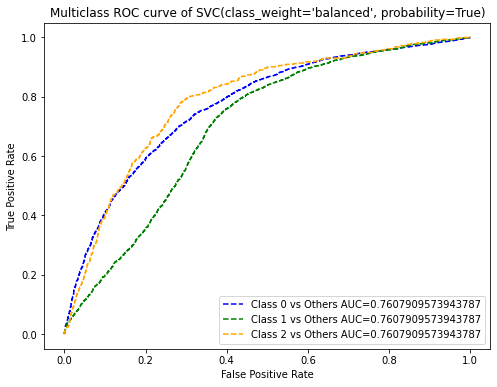



--------------Results ---------------

Training Accuracy:  0.5579557428872497
Test Accuracy:  0.606515728909811
Train Recall:  0.5579557428872497
Test Recall:  0.606515728909811
Train Precision:  0.5479051341405635
Test Precision:  0.7736008180927433
Train F1:  0.5409244512948724
Test F1:  0.6690577460073562
Train Auc:  0.7440926947671611
Test Auc:  0.7607909573943787


In [49]:
#Training and Evaluating SVM with RUS data
train_evaluate(SVC(probability =True,class_weight='balanced',gamma='scale'),x_rus,y_rus,"RUS")

## **KNN**

----- Evaluation on KNeighborsClassifier------
--------------Test data ---------------

Confusion matrix 

[[6895 2363 1442]
 [ 727  793  688]
 [ 112  166  197]]


Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.64      0.75     10700
           1       0.24      0.36      0.29      2208
           2       0.08      0.41      0.14       475

    accuracy                           0.59     13383
   macro avg       0.40      0.47      0.39     13383
weighted avg       0.76      0.59      0.65     13383



ROC Curve 



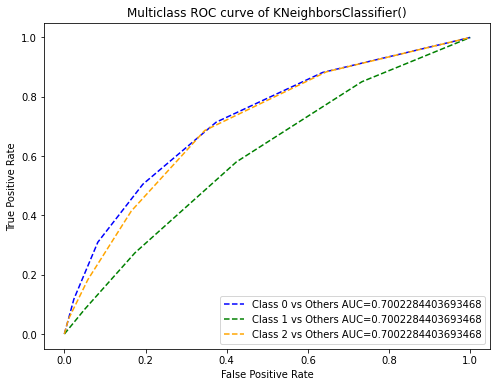



--------------Results ---------------

Training Accuracy:  0.6559536354056902
Test Accuracy:  0.589180303369947
Train Recall:  0.6559536354056902
Test Recall:  0.5891803033699469
Train Precision:  0.6555429690303632
Test Precision:  0.7551767378620869
Train F1:  0.6533420100418806
Test F1:  0.6504101049691823
Train Auc:  0.8463218358259282
Test Auc:  0.7002284403693468


In [50]:
#Training and Evaluating KNN with RUS data
train_evaluate(KNeighborsClassifier(),x_rus,y_rus,"RUS")

## **Logistic Regression**

### Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.

----- Evaluation on LogisticRegression------
--------------Test data ---------------

Confusion matrix 

[[7370 1508 1822]
 [ 635  537 1036]
 [  88   69  318]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.69      0.78     10700
           1       0.25      0.24      0.25      2208
           2       0.10      0.67      0.17       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.40     13383
weighted avg       0.77      0.61      0.67     13383



ROC Curve 



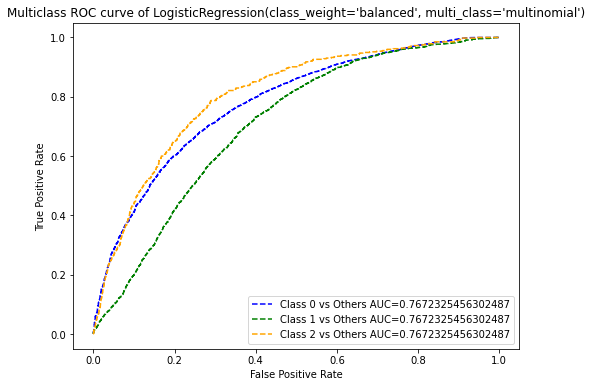



--------------Results ---------------

Training Accuracy:  0.5426765015806112
Test Accuracy:  0.6145856683852648
Train Recall:  0.5426765015806112
Test Recall:  0.6145856683852648
Train Precision:  0.5291139320708222
Test Precision:  0.7735588148789915
Train F1:  0.5200423215292821
Test F1:  0.6742736240191519
Train Auc:  0.7282966689281194
Test Auc:  0.7672325456302487


In [51]:
#Training and Evaluating Logistic regression using RUS data
train_evaluate(LogisticRegression(class_weight='balanced',multi_class='multinomial', solver='lbfgs'),x_rus,y_rus,"RUS") 

## **Decision Tree**

----- Evaluation on DecisionTreeClassifier------
--------------Test data ---------------

Confusion matrix 

[[5743 2697 2260]
 [ 605  740  863]
 [  95  150  230]]


Classification Report 

              precision    recall  f1-score   support

           0       0.89      0.54      0.67     10700
           1       0.21      0.34      0.26      2208
           2       0.07      0.48      0.12       475

    accuracy                           0.50     13383
   macro avg       0.39      0.45      0.35     13383
weighted avg       0.75      0.50      0.58     13383



ROC Curve 



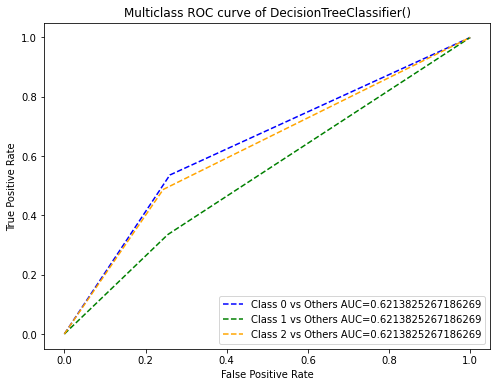



--------------Results ---------------

Training Accuracy:  0.9992975061468212
Test Accuracy:  0.5016065157289098
Train Recall:  0.9992975061468212
Test Recall:  0.5016065157289098
Train Precision:  0.9992984300919013
Test Precision:  0.7491289240956921
Train F1:  0.9992973667896925
Test F1:  0.5820895779524268
Train Auc:  0.9999993985497833
Test Auc:  0.6213825267186269


In [52]:
#Training and Evaluating Decision tree with RUS data
train_evaluate(DecisionTreeClassifier(),x_rus,y_rus,"RUS")

### Clearly, we can see that the Decision Tree is working really well with train data but not on test data. From this we can say that the decision tree is overfitting the data

## **Random Forest**

----- Evaluation on RandomForestClassifier------
--------------Test data ---------------

Confusion matrix 

[[7670 1441 1589]
 [ 676  589  943]
 [  81   88  306]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.72      0.80     10700
           1       0.28      0.27      0.27      2208
           2       0.11      0.64      0.18       475

    accuracy                           0.64     13383
   macro avg       0.43      0.54      0.42     13383
weighted avg       0.78      0.64      0.69     13383



ROC Curve 



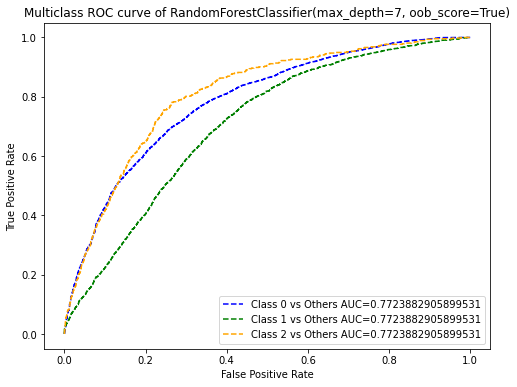



--------------Results ---------------

Training Accuracy:  0.6016859852476291
Test Accuracy:  0.6399910334005828
Train Recall:  0.6016859852476291
Test Recall:  0.6399910334005828
Train Precision:  0.5969268958064072
Test Precision:  0.7774086292188609
Train F1:  0.5897457367135974
Test F1:  0.6927057263144709
Train Auc:  0.7981672331402401
Test Auc:  0.7723882905899531


In [53]:
#Training and Evaluating Random forest with RUS data
train_evaluate(RandomForestClassifier(max_depth=7,oob_score=True),x_rus,y_rus,"RUS")

## **XGBoost**

----- Evaluation on XGBClassifier------
--------------Test data ---------------

Confusion matrix 

[[7592 1634 1474]
 [ 649  640  919]
 [  86   86  303]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.71      0.80     10700
           1       0.27      0.29      0.28      2208
           2       0.11      0.64      0.19       475

    accuracy                           0.64     13383
   macro avg       0.43      0.55      0.42     13383
weighted avg       0.78      0.64      0.69     13383



ROC Curve 



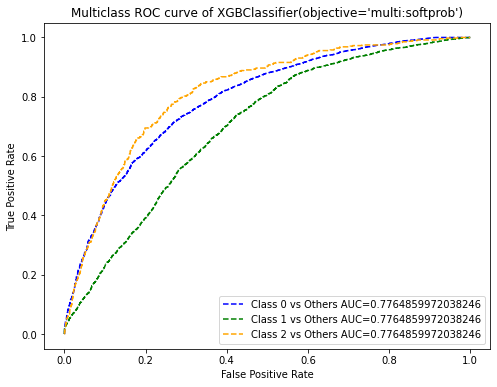



--------------Results ---------------

Training Accuracy:  0.5848261327713382
Test Accuracy:  0.6377493835462901
Train Recall:  0.5848261327713382
Test Recall:  0.6377493835462901
Train Precision:  0.5762629521705422
Test Precision:  0.7776811265796193
Train F1:  0.5718617912341732
Test F1:  0.6910509690955627
Train Auc:  0.7720441220177785
Test Auc:  0.7764859972038246


In [54]:
#Training and Evaluating Extreme gradient boost with RUS data
train_evaluate(XGBClassifier(),x_rus,y_rus,"RUS")

# **Hyperparameter Tuning RUS**

### We will use hyperparameter tuning for the Decision Tree because of Overfitting. 

### we will also tune the hyperparameters of RandomForest and Xgboost to improve the f1_score and Auc score because these are the best models we have got so far.

## **RandomizedSearchCV**

In [55]:
#Creating seperate dictionaries containing values of parameters for each model for RUS data
randomforest_params = {"n_estimators":[100,150,200],'max_depth' : [3,5,7],'min_samples_split': [3,4,5],'min_samples_leaf': [4,5,6]}
Xgboost_params = {"n_estimators":[100,150], 'max_depth' : [3,5,7],'min_samples_leaf': [2,3,4],'min_samples_split': [10,15,20] }
Decision_params= {'max_depth':[None,3,5,7],'min_samples_leaf': [4,6,8], 'min_samples_split': [6,8,10],'criterion': ["gini",'entropy']}

In [56]:
#Function for Hyperparameter tuning
# model : Classsifier, parameters: parameter grid for hyperparameter tuning, x: x_train, y: y_train, method: RandomizedSearch or GridSearch, Technique : Sampling technique used.
def tuned(model,parameters,x,y,method,Technique):
  tuned=method(model, parameters, cv=5, n_jobs=-1,scoring='f1_weighted') # Using Randomizedsearchcv with 5-fold cross validation with scoring as weighted f1 score
  print(model)
  print('\n')
  model=model.fit(x,y) # fitting the model
  tuned.fit(x,y) # fitting the model for tuning
  Model=tuned.best_estimator_  # Saving the best model which gives best F1_score value
  params=tuned.best_params_    # Saving the best parameters
  print("Best_Estimator : ",Model)
  print("Best_Parameters : ",params)
  predictions=Model.predict(x_test) 
  print("\n")
  print("Test Results ---------------------------\n")
  #Calling the train_evaluate function
  train_evaluate(Model,x,y,Technique)

DecisionTreeClassifier()


Best_Estimator :  DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=8)
Best_Parameters :  {'min_samples_split': 8, 'min_samples_leaf': 4, 'max_depth': 5, 'criterion': 'entropy'}


Test Results ---------------------------

----- Evaluation on DecisionTreeClassifier------
--------------Test data ---------------

Confusion matrix 

[[7795 1419 1486]
 [ 763  568  877]
 [  88  105  282]]


Classification Report 

              precision    recall  f1-score   support

           0       0.90      0.73      0.81     10700
           1       0.27      0.26      0.26      2208
           2       0.11      0.59      0.18       475

    accuracy                           0.65     13383
   macro avg       0.43      0.53      0.42     13383
weighted avg       0.77      0.65      0.69     13383



ROC Curve 



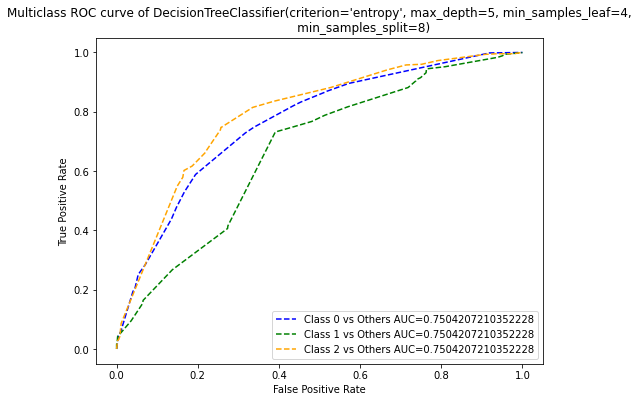



--------------Results ---------------

Training Accuracy:  0.5491745697225149
Test Accuracy:  0.6459687663453635
Train Recall:  0.5491745697225149
Test Recall:  0.6459687663453635
Train Precision:  0.5365738584575087
Test Precision:  0.7694066238113256
Train F1:  0.5338488894456895
Test F1:  0.6942985504175526
Train Auc:  0.7335622267796726
Test Auc:  0.7504207210352228


In [57]:
#Tuning and Evaluating Decision tree with RUS  data
tuned(DecisionTreeClassifier(),Decision_params,x_rus,y_rus,RandomizedSearchCV,"Tuned_RUS")

RandomForestClassifier()


Best_Estimator :  RandomForestClassifier(max_depth=7, min_samples_leaf=6, min_samples_split=3,
                       n_estimators=150)
Best_Parameters :  {'n_estimators': 150, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_depth': 7}


Test Results ---------------------------

----- Evaluation on RandomForestClassifier------
--------------Test data ---------------

Confusion matrix 

[[7667 1465 1568]
 [ 686  580  942]
 [  84   86  305]]


Classification Report 

              precision    recall  f1-score   support

           0       0.91      0.72      0.80     10700
           1       0.27      0.26      0.27      2208
           2       0.11      0.64      0.19       475

    accuracy                           0.64     13383
   macro avg       0.43      0.54      0.42     13383
weighted avg       0.78      0.64      0.69     13383



ROC Curve 



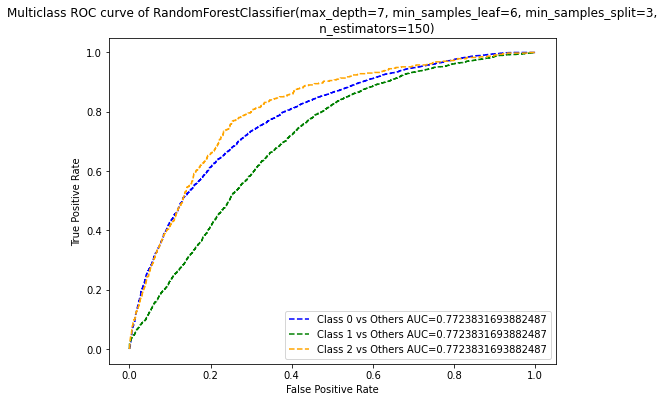



--------------Results ---------------

Training Accuracy:  0.5860554970144011
Test Accuracy:  0.639019651797056
Train Recall:  0.5860554970144011
Test Recall:  0.639019651797056
Train Precision:  0.5799163459501641
Test Precision:  0.7753037972450711
Train F1:  0.5720245910117517
Test F1:  0.6913252099454384
Train Auc:  0.7877516884095548
Test Auc:  0.7723831693882487


In [58]:
#Tuning the parameters for Random forest using RUS data
tuned(RandomForestClassifier(),randomforest_params,x_rus,y_rus,RandomizedSearchCV,"Tuned_RUS")

XGBClassifier()


Best_Estimator :  XGBClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=10,
              n_estimators=150, objective='multi:softprob')
Best_Parameters :  {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5}


Test Results ---------------------------

----- Evaluation on XGBClassifier------
--------------Test data ---------------

Confusion matrix 

[[7217 1919 1564]
 [ 596  681  931]
 [  73  107  295]]


Classification Report 

              precision    recall  f1-score   support

           0       0.92      0.67      0.78     10700
           1       0.25      0.31      0.28      2208
           2       0.11      0.62      0.18       475

    accuracy                           0.61     13383
   macro avg       0.42      0.53      0.41     13383
weighted avg       0.78      0.61      0.67     13383



ROC Curve 



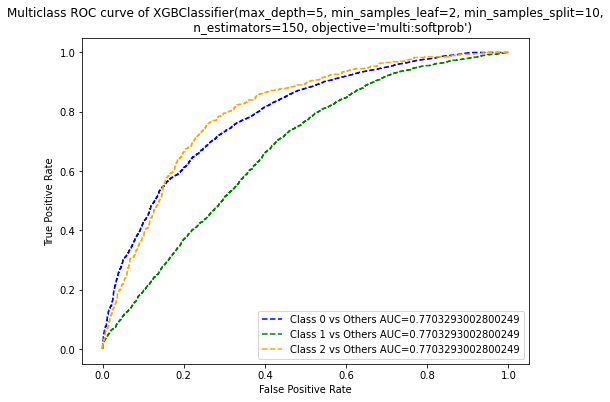



--------------Results ---------------

Training Accuracy:  0.6828240252897787
Test Accuracy:  0.6121945752073527
Train Recall:  0.6828240252897787
Test Recall:  0.6121945752073527
Train Precision:  0.6825014617702193
Test Precision:  0.7769534511102888
Train F1:  0.6782245116033501
Test F1:  0.6730464135542413
Train Auc:  0.8599382754775238
Test Auc:  0.7703293002800249


In [59]:
#Tuning the parameters for xgboost using resampled data after Randomundersampling
tuned(XGBClassifier(),Xgboost_params,x_rus,y_rus,RandomizedSearchCV,"Tuned_RUS")

In [60]:
#creating a dictionary to store all the metrics
all_metrics={'Accuracy_train' :Accuracy_train,'Accuracy_test':Accuracy_test,'Train_recall':Train_recall,'Test_recall':Test_recall,
'Train_precision':Train_precision,'Test_precision':Test_precision,'Train_f1':Train_f1,'Test_f1':Test_f1,'Train_auc':Train_auc,'Test_auc':Test_auc}

In [61]:
# Creating a funtion to create a comparision dataframe for all the models. 
def metrics_df(model_list,all_metrics):
#converting dictionary to dataframe fro easy visual
 metrics=pd.DataFrame.from_dict(all_metrics,orient='index',columns=model_list)
 metrics=metrics.T
 return metrics
#return metrics.sort_values([Test_f1,Test_auc],ascending=False) #sort the dataframe with respect to test_auc score

## **Comparision Dataframe**

In [62]:
#Calling the function metrics_df to compare the results 
metrics_df(model_list,all_metrics)

,Accuracy_train,Accuracy_test,Train_recall,Test_recall,Train_precision,Test_precision,Train_f1,Test_f1,Train_auc,Test_auc
SVC_RUS,0.557956,0.606516,0.557956,0.606516,0.547905,0.773601,0.540924,0.669058,0.744093,0.760791
KNeighborsClassifier_RUS,0.655954,0.589180,0.655954,0.589180,0.655543,0.755177,0.653342,0.650410,0.846322,0.700228
LogisticRegression_RUS,0.542677,0.614586,0.542677,0.614586,0.529114,0.773559,0.520042,0.674274,0.728297,0.767233
DecisionTreeClassifier_RUS,0.999298,0.501607,0.999298,0.501607,0.999298,0.749129,0.999297,0.582090,0.999999,0.621383
RandomForestClassifier_RUS,0.601686,0.639991,0.601686,0.639991,0.596927,0.777409,0.589746,0.692706,0.798167,0.772388
XGBClassifier_RUS,0.584826,0.637749,0.584826,0.637749,0.576263,0.777681,0.571862,0.691051,0.772044,0.776486
DecisionTreeClassifier_Tuned_RUS,0.549175,0.645969,0.549175,0.645969,0.536574,0.769407,0.533849,0.694299,0.733562,0.750421
RandomForestClassifier_Tuned_RUS,0.586055,0.639020,0.586055,0.639020,0.579916,0.775304,0.572025,0.691325,0.787752,0.772383
XGBClassifier_Tuned_RUS,0.682824,0.612195,0.682824,0.612195,0.682501,0.776953,0.678225,0.673046,0.859938,0.770329
